In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from cycifsuite.get_data import read_synapse_file
from tma_analysis_functions import spotwise_clusterdist_plot

## Read data from imstor

In [3]:
path = 'N:/HiTS Projects and Data/Personal/Jake/mgh_tma/processed_data'
os.chdir(path)
expr = pd.read_hdf('index_corrected_tma_expr_data.hdf')
metadata = pd.read_csv('clustered_metadata.csv',index_col=0)
channel_info = pd.read_csv(read_synapse_file('syn18555930'),index_col=0).stack()
roi_metadata = pd.read_csv('roi_metadata.csv', index_col=0)

metadata['group_id'] = metadata.Plate + '_' + metadata.ROI.astype(str)
colnames = channel_info.values
expr.columns = colnames
valid_cells = metadata[metadata.labeled_as_lost=='No'].index
valid_cols = [x for x in colnames if 'DNA' not in x]
expr = expr.reindex(valid_cells)[valid_cols]
metadata = metadata.loc[valid_cells]
print(expr.columns)

Welcome, Yunguan Wang!

Index(['A488', 'A555', 'A647', 'Rb', 'pCTD', 'CDK4', 'CK8-FITC', 'pRB', 'aSMA',
       'CD4', 'CD45-PE', 'PD1', 'CycD1', 'FOXP3-570', 'CD8a', 'EGFR',
       'Ki67-570', 'PDL1', 'Ecad', 'Vimentin', 'CK5', 'Bax', 'gH2ax-PE',
       'Bcl2|CycA2', 'pERK', 'E2F1', 'pAKT', 'B-Catenin', 'FOXO1a', 'p21',
       'p53', 'ER-568', 'AKT'],
      dtype='object')


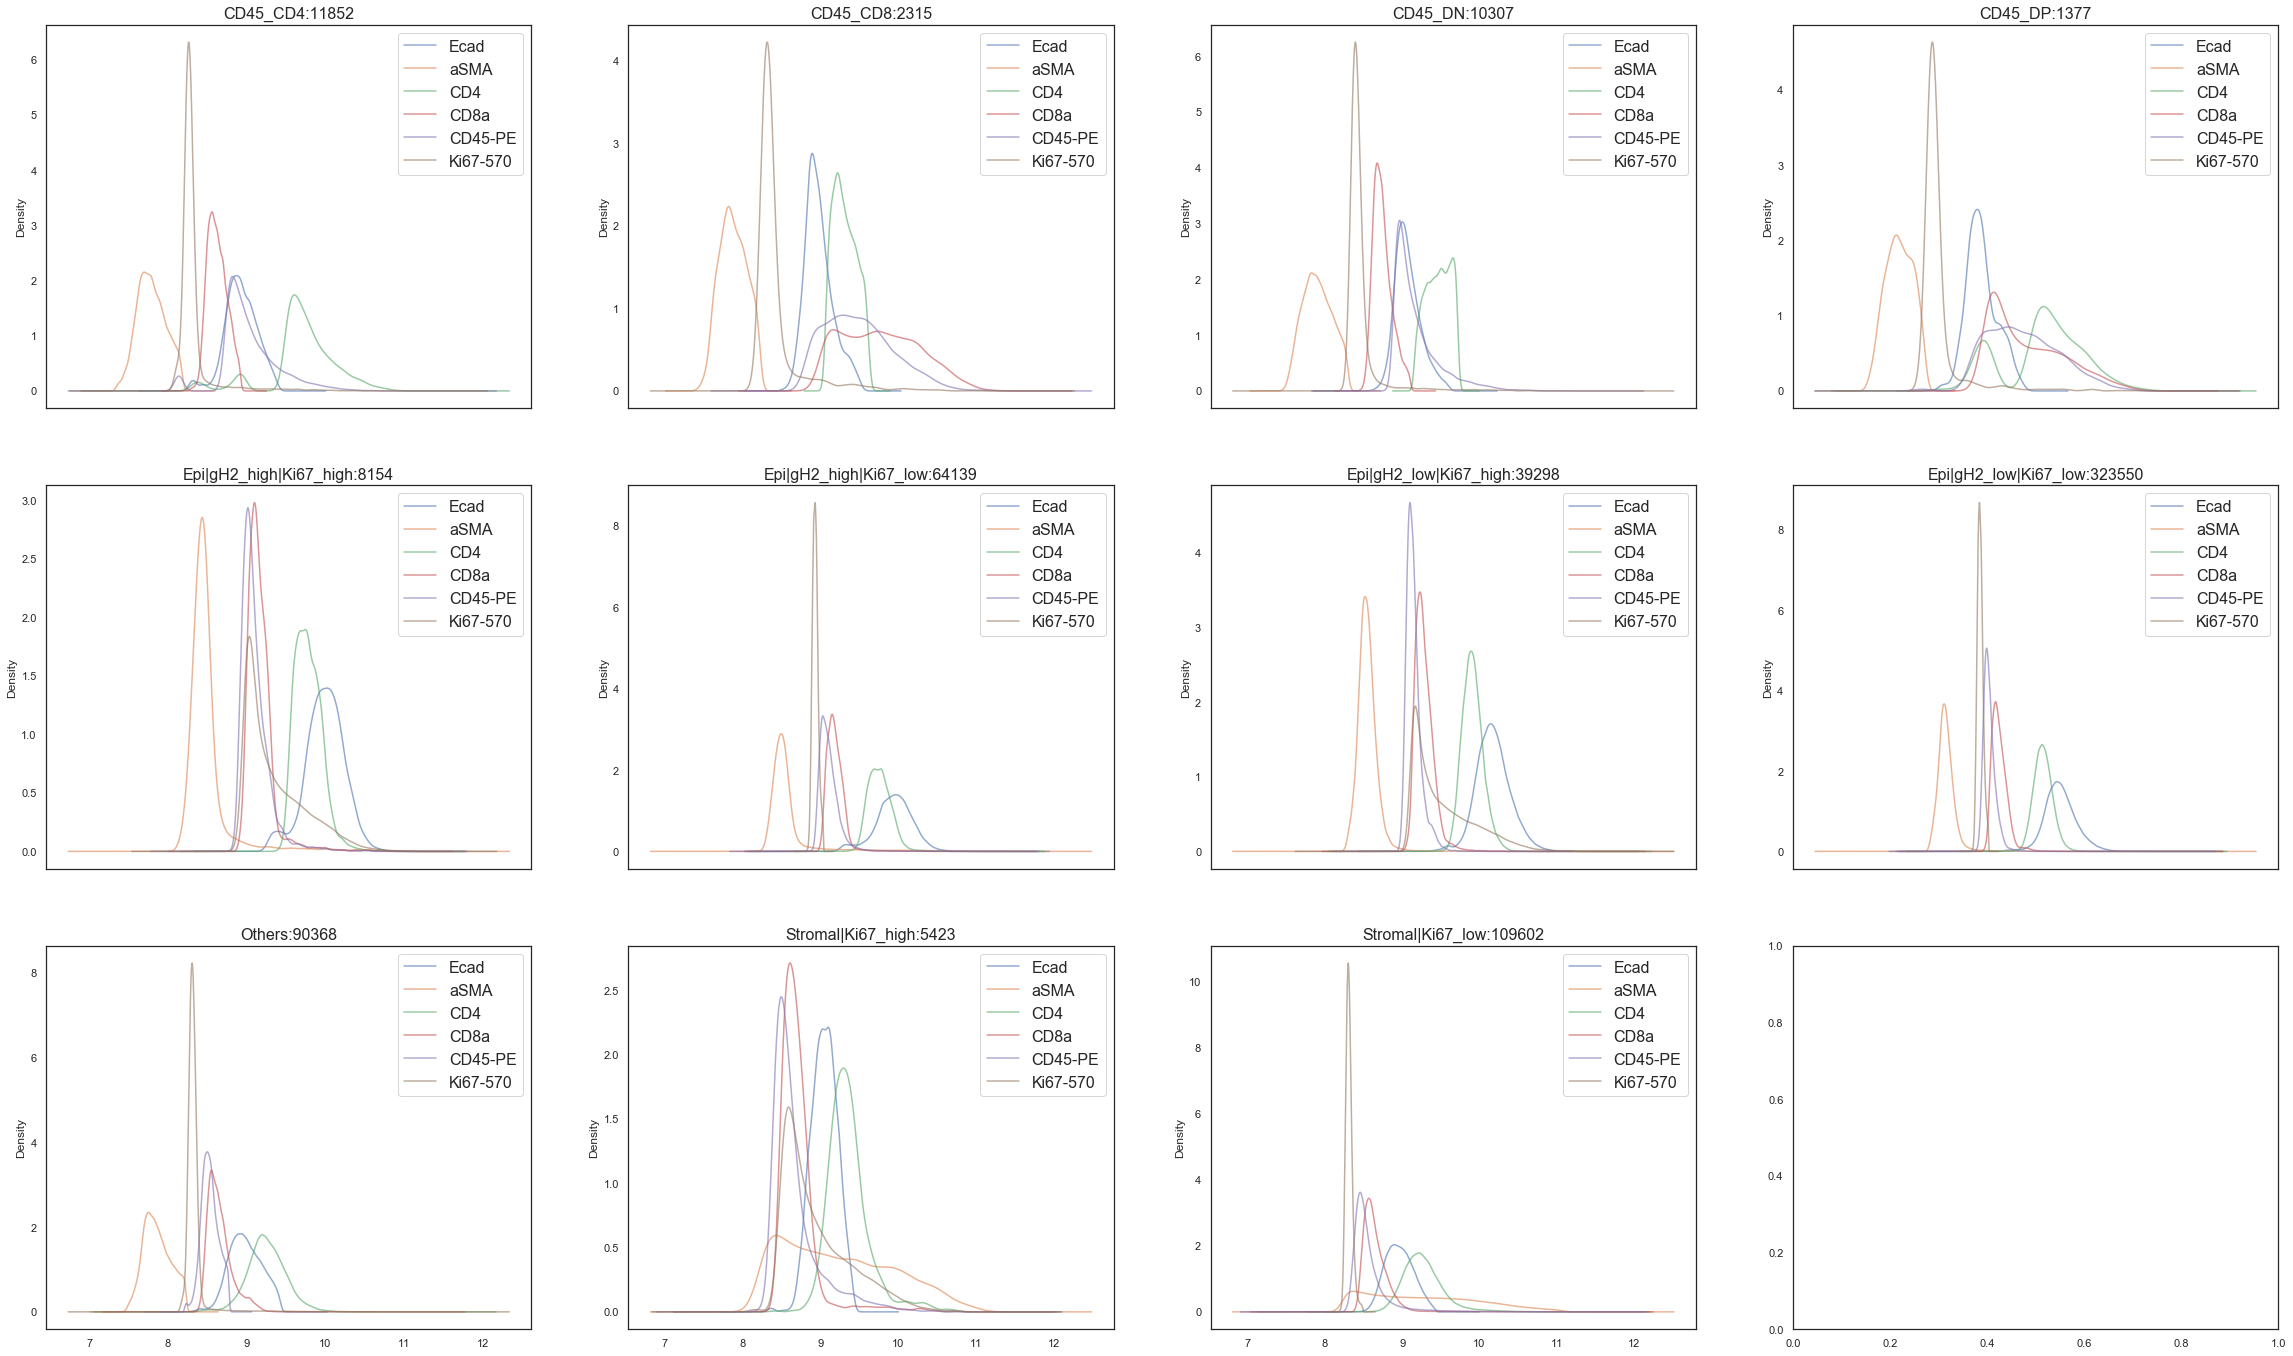

In [9]:
# plot histograms of all clusters
group_ids = roi_metadata.loc[roi_metadata.patient == 'T01354','group_id'].values
plot_data_idx = metadata[metadata.group_id.isin(group_ids)].index
plot_data_expr = expr.loc[plot_data_idx]
fig, axes = plt.subplots(int(np.ceil(metadata.cluster.nunique()/4)),
                         4,figsize=(40,24))
axes = axes.ravel()
i=0
sns.set(font_scale=1,style='white')
for cluster_group in plot_data_expr.groupby(metadata.loc[plot_data_idx,'cluster']):
    cluster_name = cluster_group[0]
    cluster_df = cluster_group[1]
    _idx = cluster_df.index
    fig = plot_data_expr.loc[_idx, ['Ecad','aSMA','CD4','CD8a','CD45-PE','Ki67-570']].plot.kde(ax=axes[i], sharex=True, alpha = 0.6)
    axes[i].legend(markerscale=3, fontsize=16)
    axes[i].set_title(cluster_name + ':' + str(cluster_df.shape[0]),fontsize=16)
    i+=1

## Summary of clusters

In [10]:
cluster_info = metadata[['cluster']]
cluster_info['plate_ROI'] = ['_'.join(x.split('_')[:2]) for x in cluster_info.index]
cluster_info['grouping_id'] = cluster_info.plate_ROI + '_' + cluster_info.cluster
# Cluster faction
roi_summary = cluster_info.groupby(['plate_ROI','cluster']).count().iloc[:,0]
roi_cell_counts = cluster_info.plate_ROI.value_counts()
roi_summary = roi_summary.reset_index().set_index('plate_ROI', drop=False)
roi_summary.columns = ['plate_ROI', 'cluster','cluster_fraction']
roi_summary['cluster_fraction'] = (roi_summary.cluster_fraction/roi_cell_counts).values
roi_summary.index = roi_summary.plate_ROI + '_' + roi_summary.cluster
roi_summary.to_csv('../results/cluster_summary.csv')

[WARNING] C:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

[WARNING] C:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until



CD45_CD4 ['TMA1_22', 'TMA2_4', 'TMA2_33', 'TMA1_24', 'TMA2_30', 'TMA2_3', 'TMA2_7', 'TMA2_8', 'TMA2_29', 'TMA1_7', 'TMA1_5', 'TMA1_46', 'TMA1_4', 'TMA1_36', 'TMA1_9', 'TMA2_27', 'TMA2_20', 'TMA2_12', 'TMA1_27', 'TMA1_18', 'TMA1_14', 'TMA4_31']
CD45_CD8 ['TMA2_11', 'TMA2_13', 'TMA1_5', 'TMA1_4', 'TMA1_7', 'TMA1_9', 'TMA2_20', 'TMA2_8', 'TMA3_12', 'TMA2_43', 'TMA2_24', 'TMA4_28', 'TMA4_25', 'TMA2_34', 'TMA2_32', 'TMA2_9', 'TMA1_22', 'TMA1_27']
CD45_DN ['TMA2_43', 'TMA1_5', 'TMA3_12', 'TMA2_12', 'TMA2_20', 'TMA1_7', 'TMA2_35', 'TMA2_29', 'TMA1_9', 'TMA3_8', 'TMA4_31']
CD45_DP ['TMA2_26', 'TMA2_3', 'TMA2_2', 'TMA2_24', 'TMA2_20', 'TMA2_30', 'TMA2_8', 'TMA2_44', 'TMA2_32', 'TMA2_33', 'TMA2_4', 'TMA2_9', 'TMA1_4', 'TMA2_13']
Epi|gH2_high|Ki67_high ['TMA3_33', 'TMA2_3', 'TMA2_4', 'TMA2_7', 'TMA1_6', 'TMA1_23', 'TMA4_33', 'TMA3_12', 'TMA1_10', 'TMA4_16', 'TMA2_2', 'TMA2_18', 'TMA4_2']
Epi|gH2_high|Ki67_low ['TMA2_5', 'TMA3_43', 'TMA3_13', 'TMA2_13', 'TMA2_15']
Epi|gH2_low|Ki67_high ['TMA1_25',

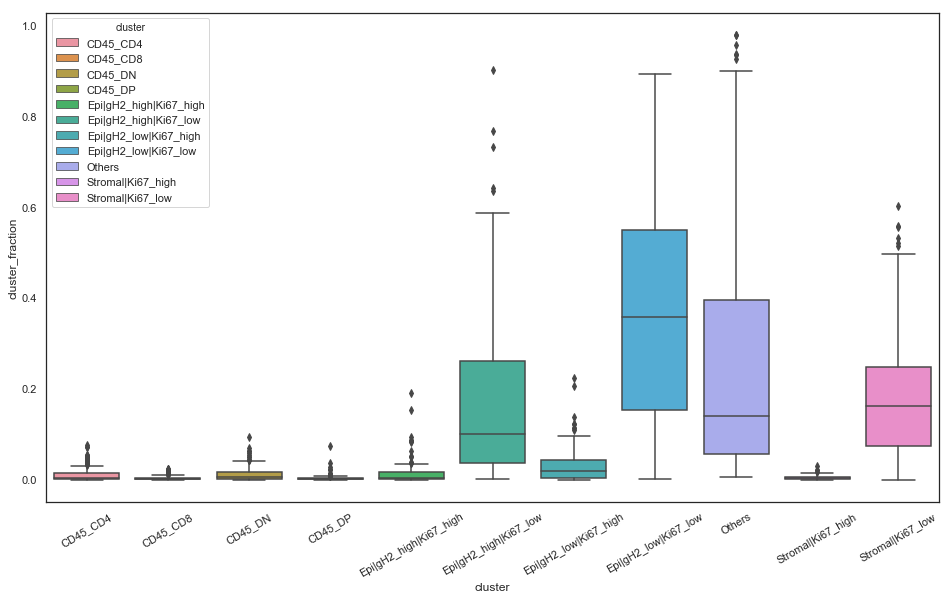

In [11]:
roi_summary = pd.read_csv('../results/cluster_summary.csv', index_col=0)
roi_summary.sort_values('cluster', inplace=True)
plt.figure(figsize=(16,9))
sns.boxplot(x='cluster', y='cluster_fraction', data = roi_summary, 
               hue='cluster', dodge=False)
plt.xticks(rotation=30, va='top')
# Annotate outliers
for _group in roi_summary.groupby('cluster'):
    group_name, group_df = _group
    q1, q3 = group_df.cluster_fraction.quantile([0.25,0.75])
    outliers = group_df.loc[group_df.cluster_fraction> q3 + 1.5 * (q3-q1),'plate_ROI'].tolist()
    print(group_name, outliers)

## Cluster means heatmap

In [12]:
cluster_means = expr.loc[cluster_info.index].groupby(cluster_info.grouping_id).mean()
cluster_means['plate_ROI'] = ['_'.join(x.split('_')[:2]) for x in cluster_means.index]
cluster_means = cluster_means.reset_index().merge(roi_metadata[['group_id', 'patient','Site']], 
                                                  left_on='plate_ROI', right_on='group_id', how='left').set_index(cluster_means.index.name)
cluster_means = cluster_means.merge(roi_summary[['cluster_fraction','cluster']], left_index=True, right_index=True, how='left')
cols_order = cluster_means.columns[-6:].tolist() + cluster_means.columns[3:-6].tolist()
cluster_means = cluster_means[cols_order[1:]]
cluster_means.to_csv('../results/tma_gated_cluster_avg_heatmap.csv')

## Within cluster distance distribution across all the spots

[WARNING] C:\WinPython\python-3.6.5.amd64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval



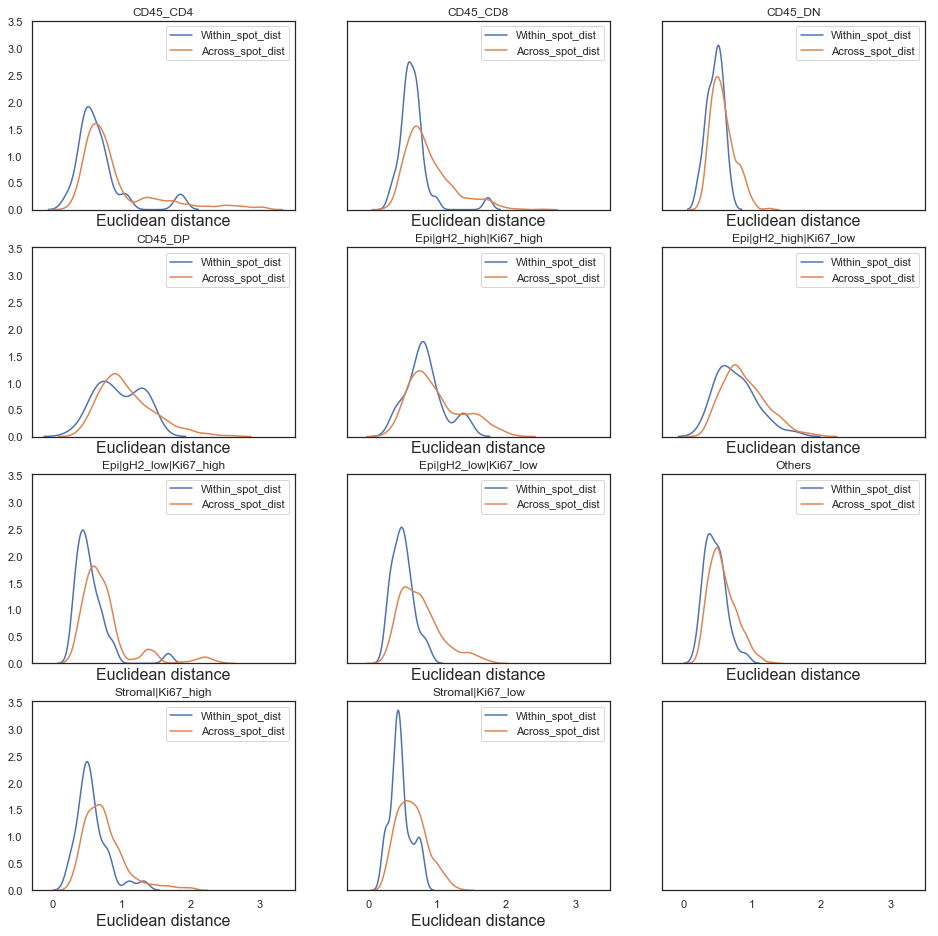

In [13]:
p1 = cluster_means[cluster_means.patient=='T01354']
spotwise_clusterdist_plot(p1)

## Process neighborhood analysis results, make a csv file for Morpheus

In [14]:
path = 'N:/HiTS Projects and Data/Personal/Jake/mgh_tma/results'
os.chdir(path)
roi_meta = pd.read_csv('../processed_data/roi_metadata.csv',index_col=0)
site_annotation = pd.read_excel('../processed_data/site_annotation.xlsx', index_col=0)
roi_meta = roi_meta.merge(site_annotation, left_on='Site', right_index=True)
pvals = pd.read_csv('neighborhood_pvalues.csv',index_col=0)
fractions = pd.read_csv('neighborhood_fractions.csv',index_col=0).fillna(0)
# make sure the two tables have the same columns and order
assert((pvals.columns==fractions.columns).all())

pvals.set_index(pvals.group_id + '_' + pvals.index, inplace=True)
fractions.set_index(fractions.group_id + '_' + fractions.index, inplace=True)
# check if indices match
assert((pvals.index==fractions.index).all())

pvals.iloc[:,:-1] = pvals.iloc[:,:-1].apply(lambda x: [True if i <=0.05 else False for i in x.values])
fractions.iloc[:,:-1] = fractions.iloc[:,:-1]*pvals.iloc[:,:-1]
fractions['cluster'] = ['_'.join(x.split('_')[2:]) for x in fractions.index]
fractions = fractions[~fractions.cluster.isin(['Others', 'CD45_DP','CD45_DN'])]
fractions.drop(['Others', 'CD45_DP','CD45_DN'], axis=1,inplace=True)

fractions = fractions.reset_index().merge(roi_meta[['group_id', 'patient', 'Site', 'organ']], on='group_id', how='left').set_index('index')
cols = fractions.columns[-5:].tolist() + fractions.columns[:-5].tolist()
fractions = fractions[cols]
fractions.transpose().to_csv('neighborhood_analysis_heatmap.csv')